In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report
from MulticoreTSNE import MulticoreTSNE as MTSNE

from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

In [2]:
sns.set(font_scale=1.2)

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<AxesSubplot:>

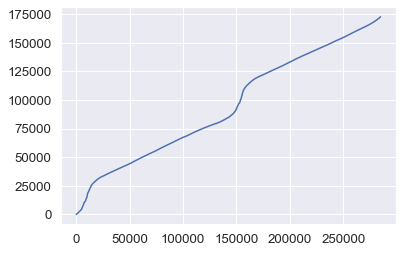

In [8]:
df['Time'].plot()

<AxesSubplot:ylabel='Frequency'>

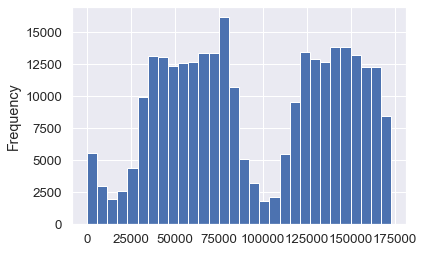

In [9]:
df['Time'].plot.hist(bins=30)

#### Так как датасет представляет собой данные о транзакциях в течении двух дней, отчетливо виден дневной цикл кол-ва транзакций

In [10]:
df[['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [11]:
df['Amount'].value_counts(normalize=True)

1.00      0.048061
1.98      0.021221
0.89      0.017106
9.99      0.016667
15.00     0.011517
            ...   
438.10    0.000004
152.29    0.000004
156.45    0.000004
724.44    0.000004
102.77    0.000004
Name: Amount, Length: 32767, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Amount'>

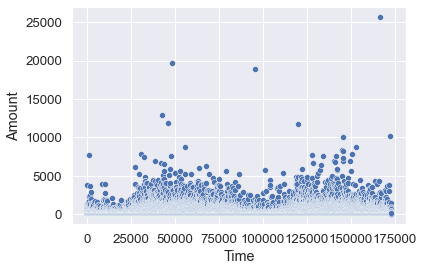

In [12]:
sns.scatterplot(x='Time', y='Amount', data=df)

#### Также виден дневной цикл по величине переводов

<AxesSubplot:ylabel='Frequency'>

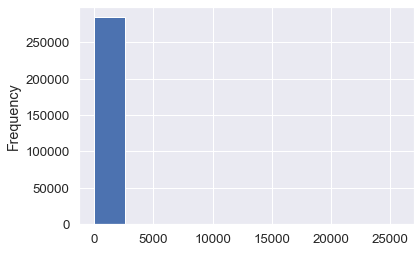

In [13]:
df['Amount'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

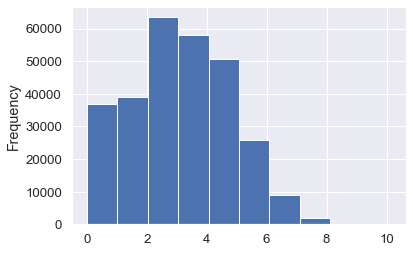

In [14]:
np.log(df['Amount'] + 1).plot.hist()

### В основном переводят мелкие суммы

In [15]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [16]:
honest_df = df.loc[df['Class'] == 0]
honest_df[['Time', 'Amount']].describe()

,Time,Amount
count,284315.000000,284315.000000
mean,94838.202258,88.291022
std,47484.015786,250.105092
min,0.000000,0.000000
25%,54230.000000,5.650000
50%,84711.000000,22.000000
75%,139333.000000,77.050000
max,172792.000000,25691.160000


In [17]:
fraud_df = df.loc[df['Class'] == 1]
fraud_df[['Time', 'Amount']].describe()

,Time,Amount
count,492.000000,492.000000
mean,80746.806911,122.211321
std,47835.365138,256.683288
min,406.000000,0.000000
25%,41241.500000,1.000000
50%,75568.500000,9.250000
75%,128483.000000,105.890000
max,170348.000000,2125.870000


<AxesSubplot:ylabel='Frequency'>

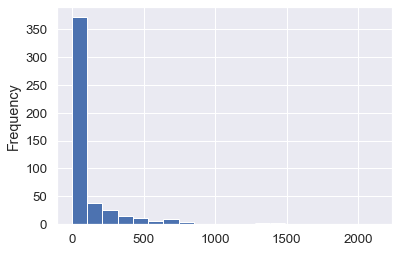

In [18]:
fraud_df['Amount'].plot.hist(bins=20)

In [19]:
fraud_df['Amount'].value_counts(normalize=True)

1.00      0.229675
0.00      0.054878
99.99     0.054878
0.76      0.034553
0.77      0.020325
            ...   
648.00    0.002033
720.38    0.002033
30.39     0.002033
22.47     0.002033
0.69      0.002033
Name: Amount, Length: 259, dtype: float64

In [20]:
len(df.columns)

31

###  Почти 23% мошеннических транзакций были на 1.00

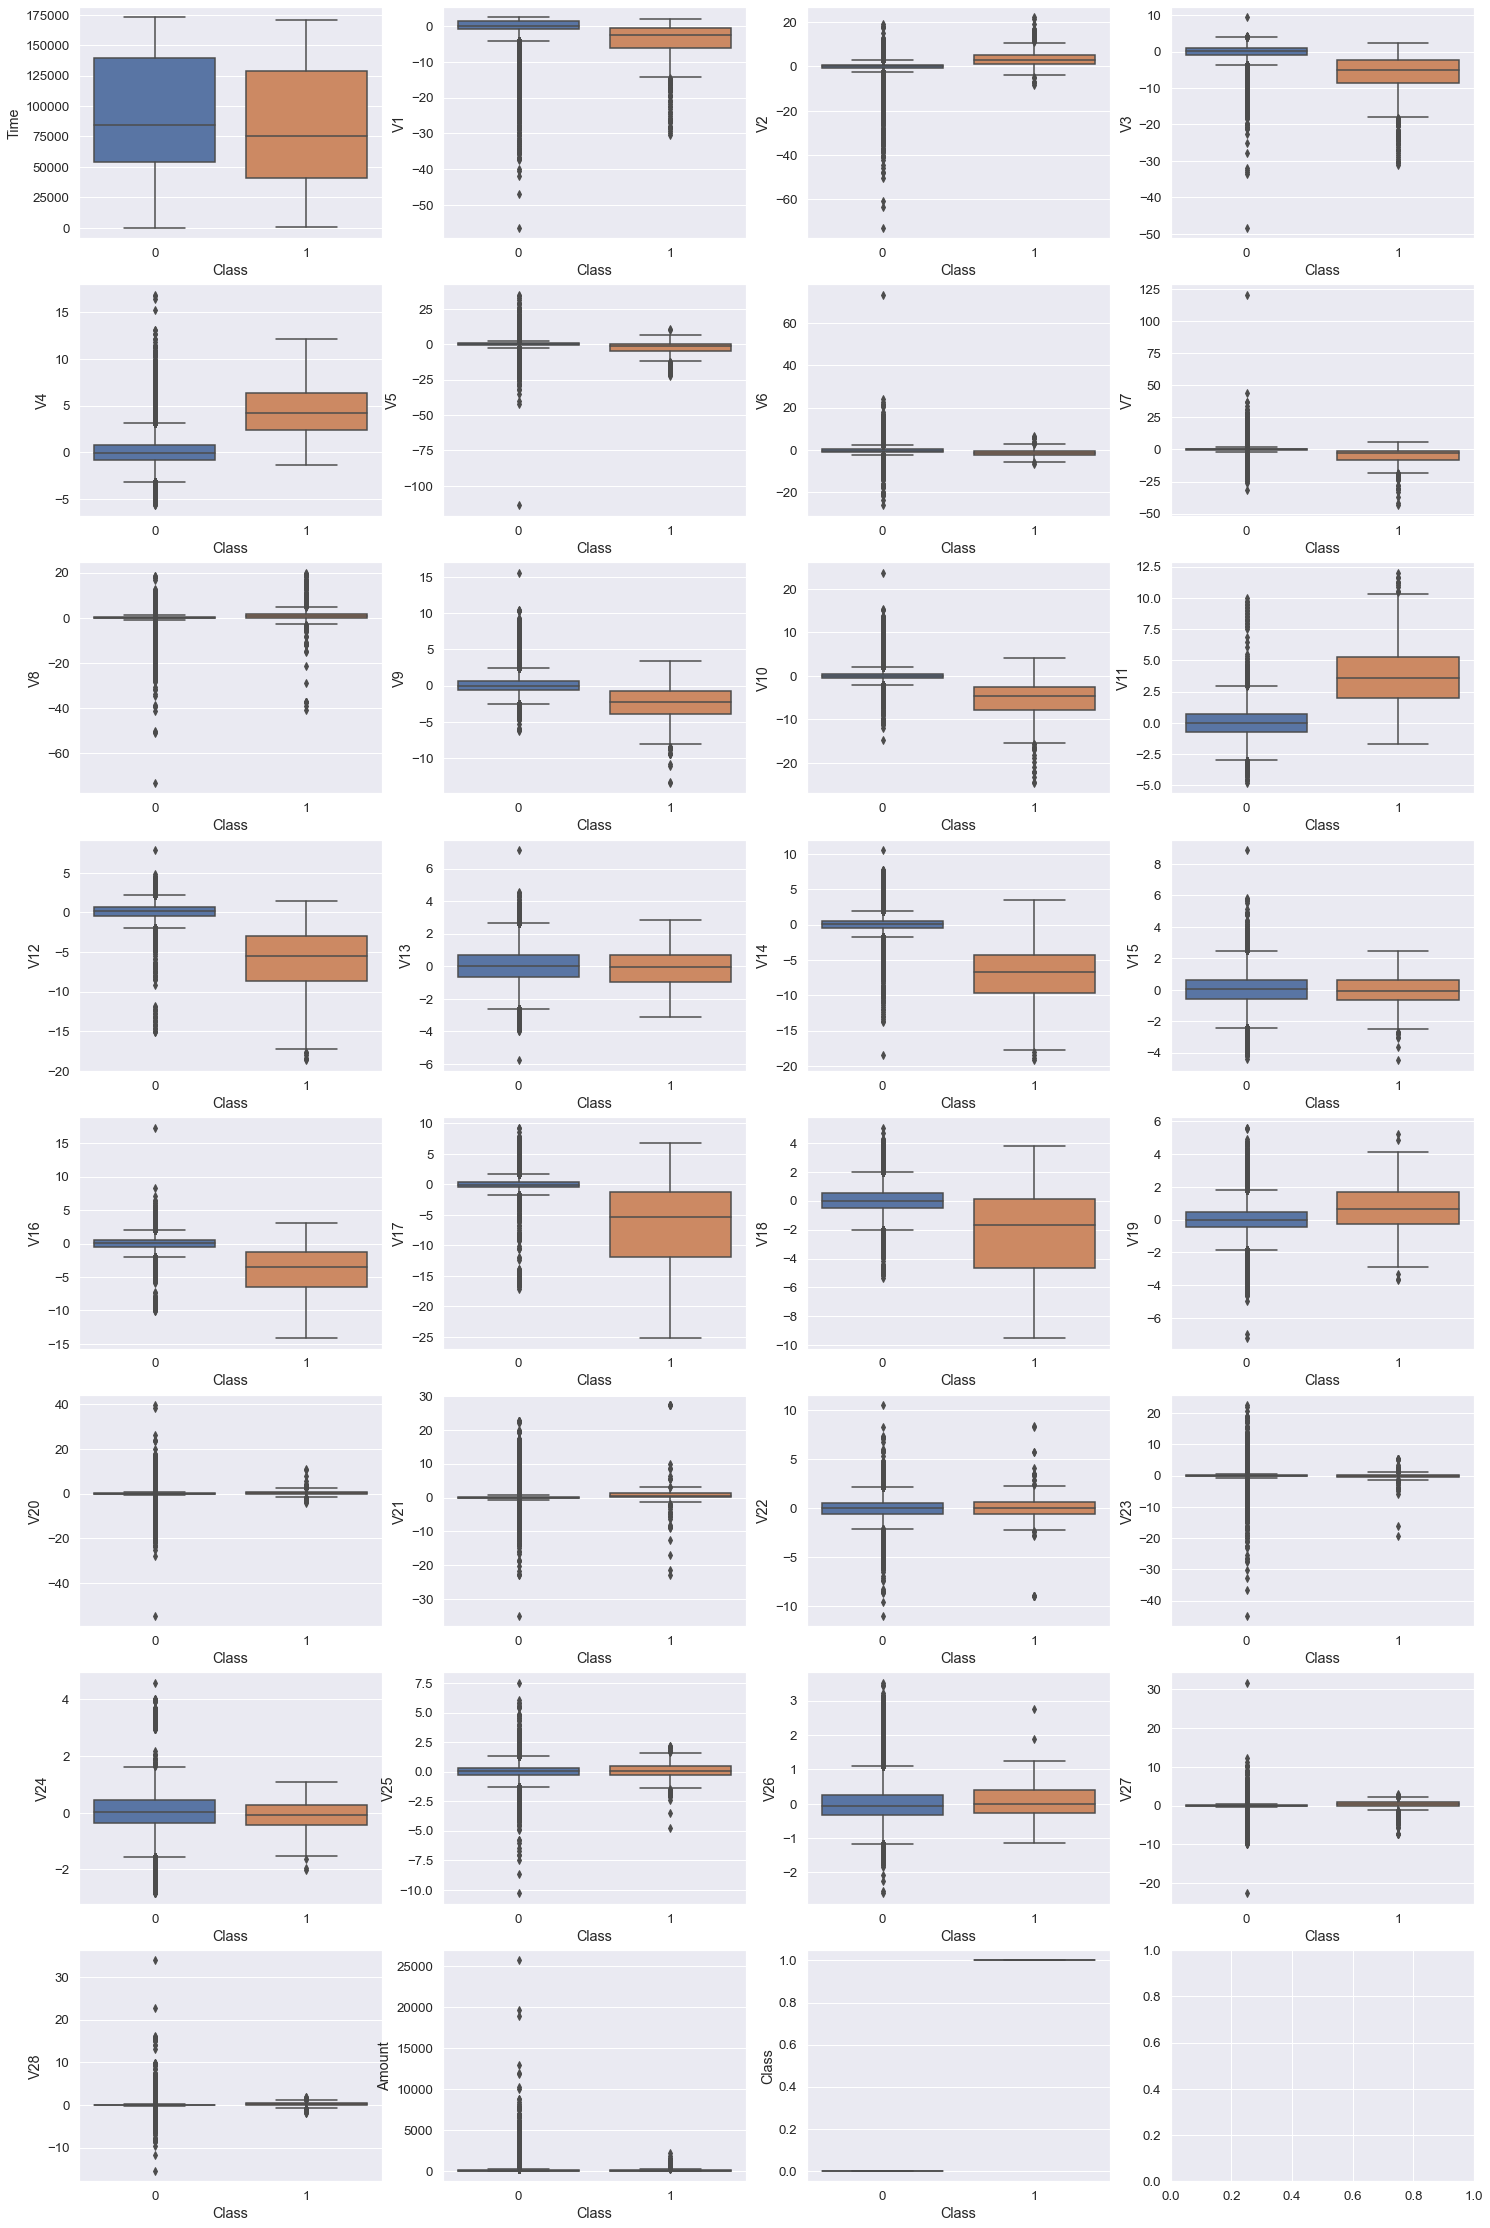

In [21]:
fig, axes = plt.subplots(8, 4, figsize=(25, 40))

row = 0
col = 0

for ax, feature in enumerate(fraud_df.columns):
    sns.boxplot(data=df, x='Class', y=feature, ax=axes[row, col])

    col += 1
    if col > 3:
        row += 1
        col = 0

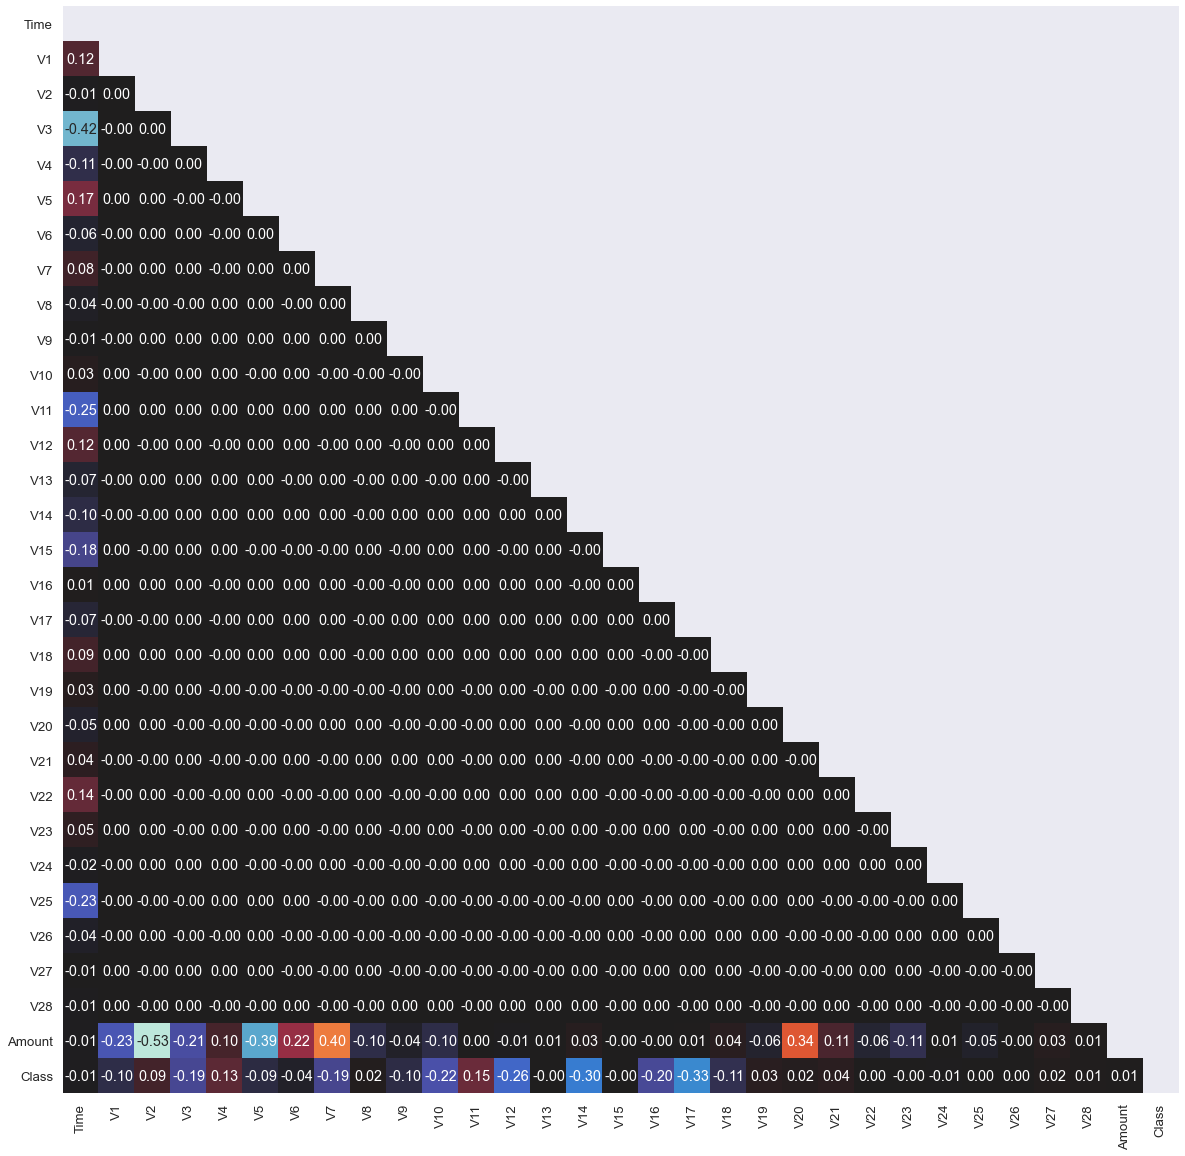

In [22]:
plt.figure(figsize=(20, 20))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

## Undersampling

    Снизим размер честных транзакций, так чтобы получилось соотношение fraud:honest 1:10
    Это сделано, чтобы можно было снизить размерность датасета (иначе не хватает вычислительных мощностей)

In [23]:
under_sampled = pd.concat([df.loc[df['Class'] == 0].sample(n= 10 * len(df.loc[df['Class'] == 1]), random_state=42), 
                           df.loc[df['Class'] == 1]])
under_sampled.reset_index(drop=True, inplace=True)

In [24]:
under_sampled.shape

(5412, 31)

In [25]:
under_sampled['Class'].value_counts(normalize=True)

0    0.909091
1    0.090909
Name: Class, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Amount'>

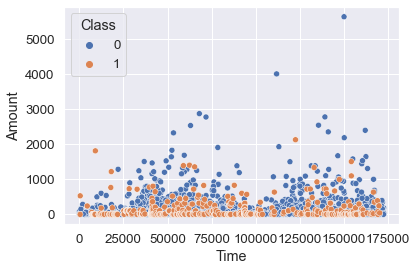

In [26]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=under_sampled)

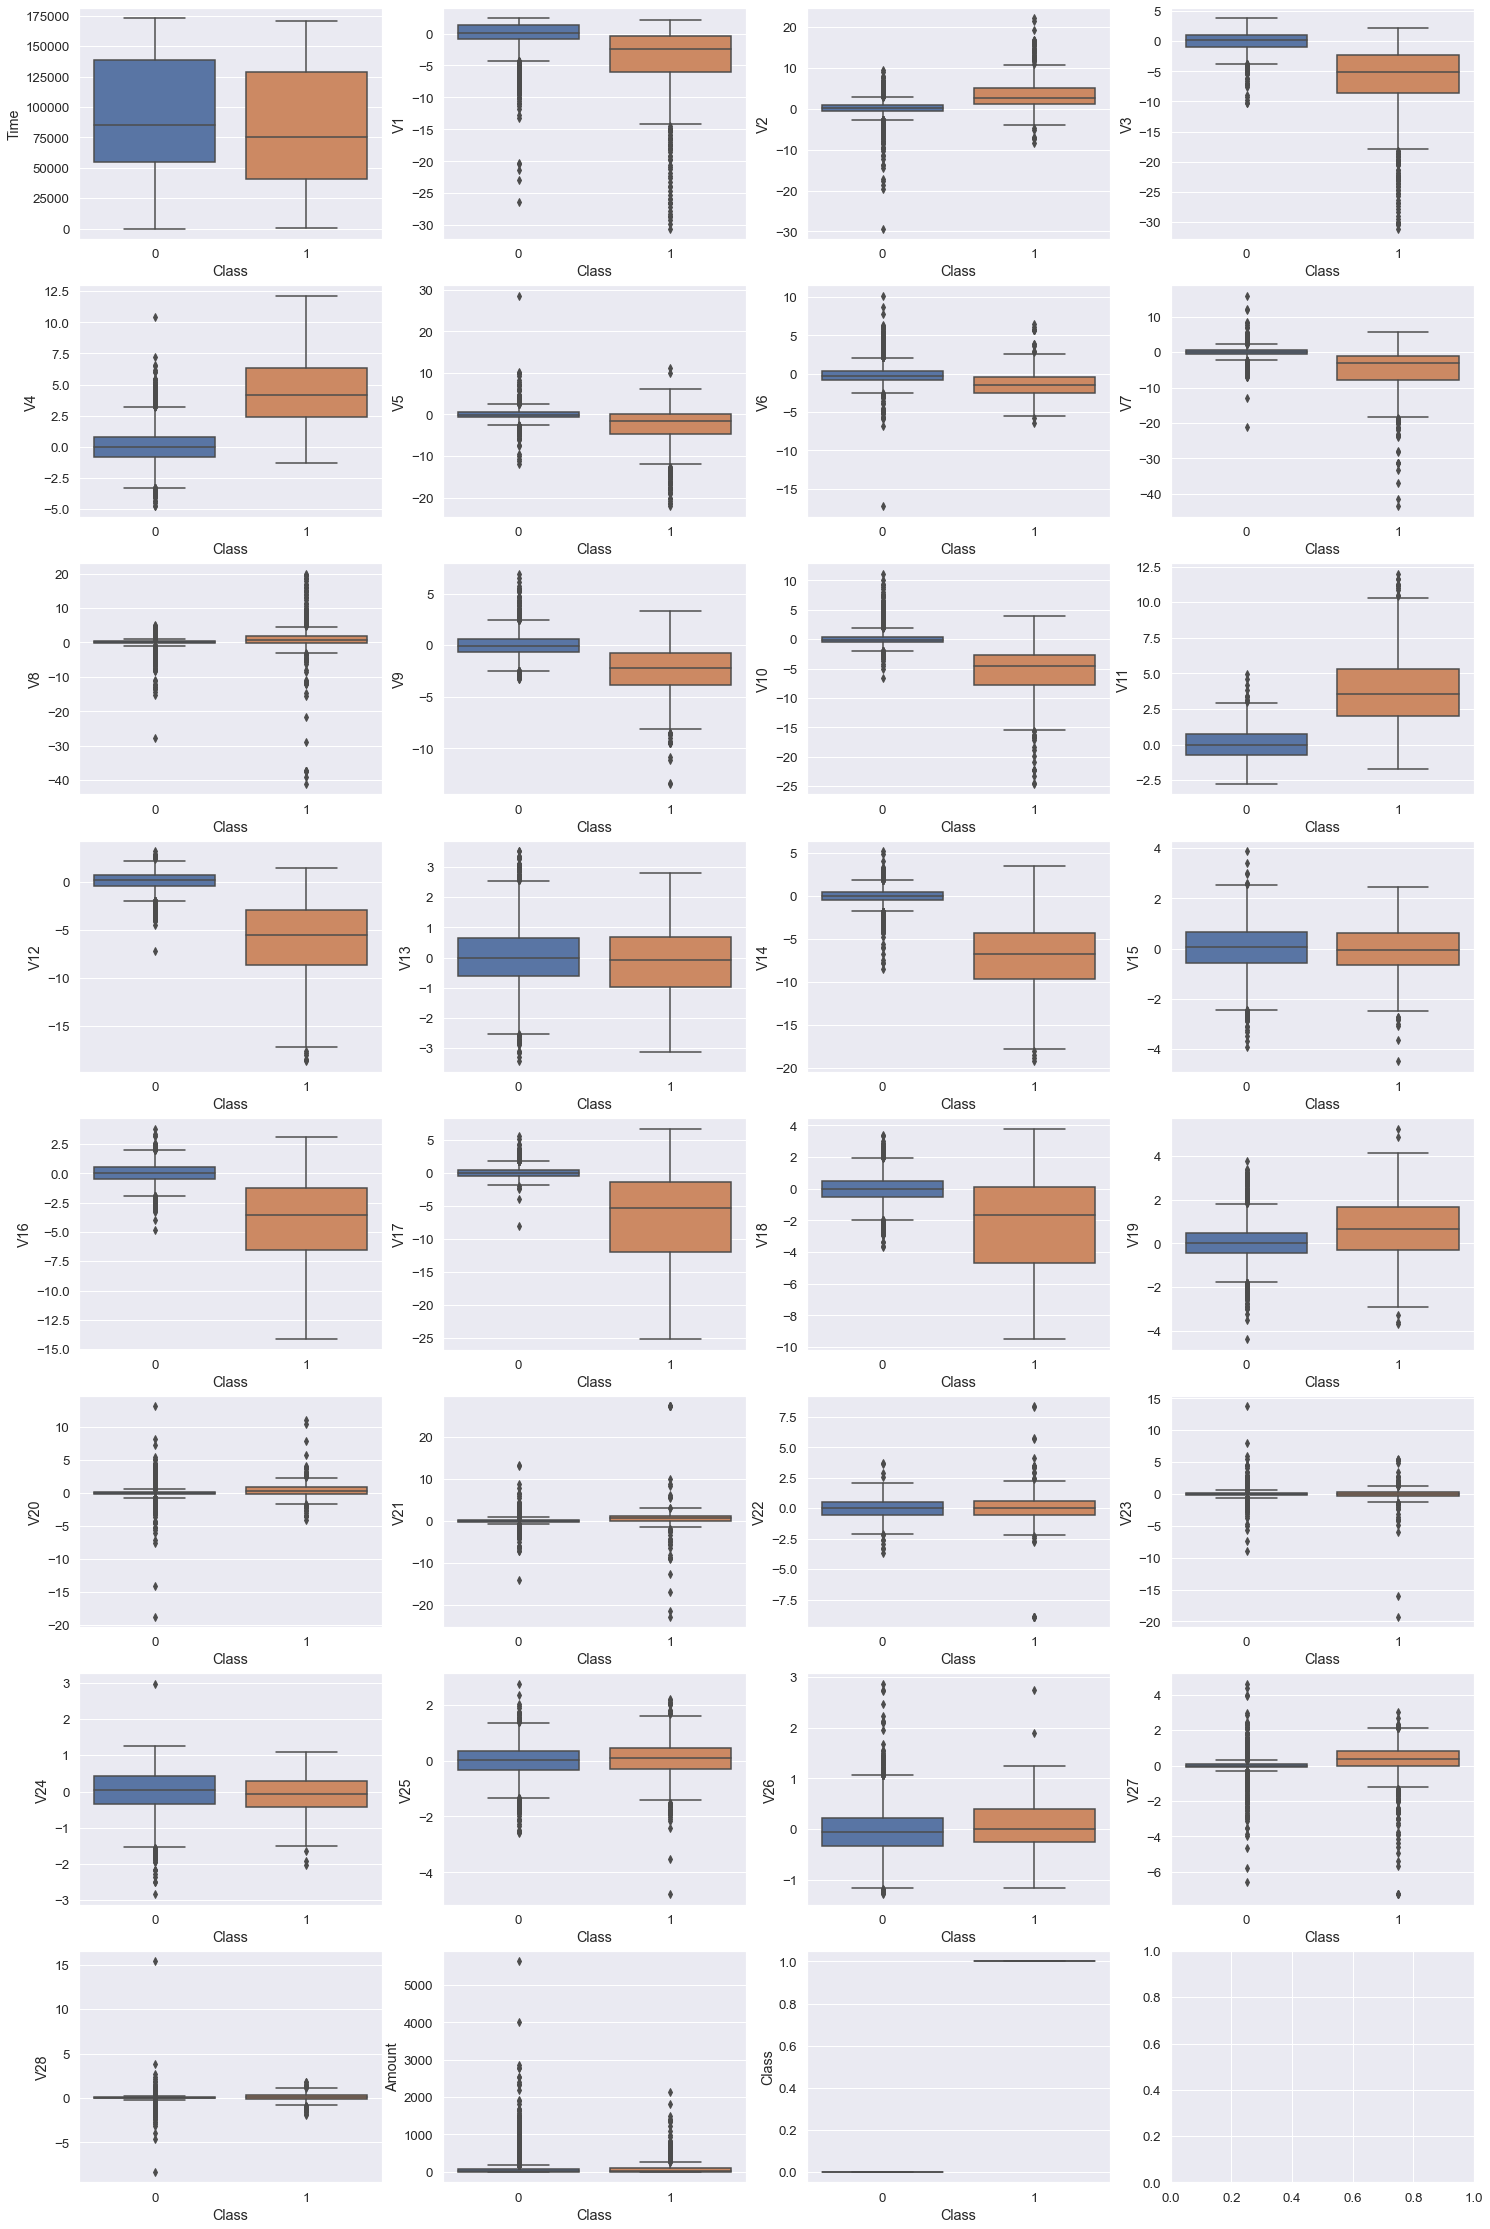

In [27]:
fig, axes = plt.subplots(8, 4, figsize=(25, 40))

row = 0
col = 0

for ax, feature in enumerate(under_sampled.columns):
    sns.boxplot(data=under_sampled, x='Class', y=feature, ax=axes[row, col])

    col += 1
    if col > 3:
        row += 1
        col = 0

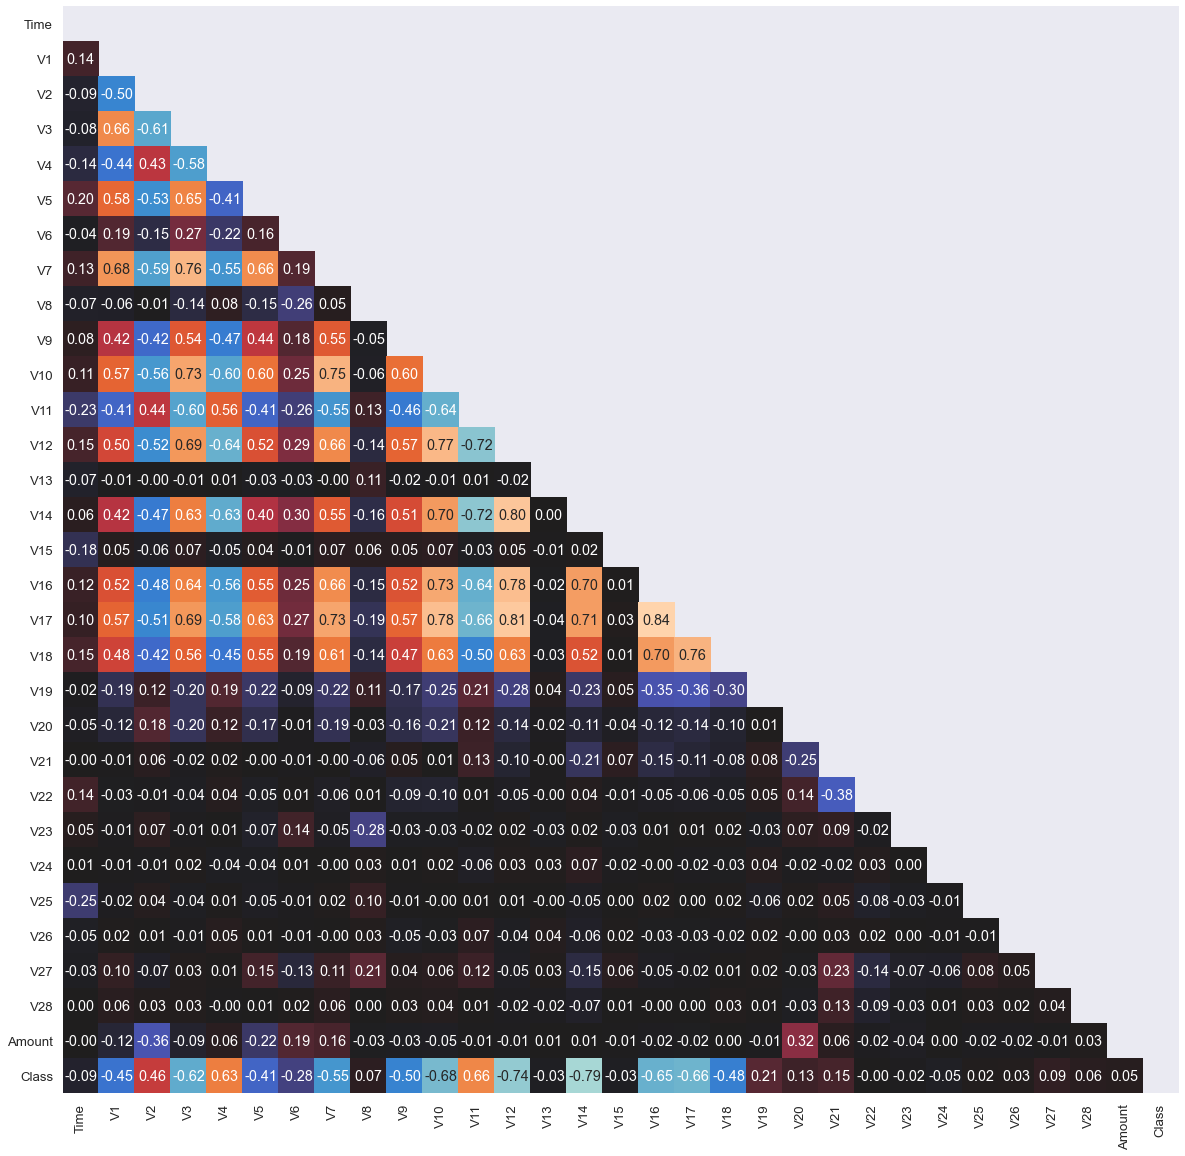

In [28]:
plt.figure(figsize=(20, 20))

corr_matrix = under_sampled.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=False, center=0);

### Применим scaling

In [29]:
scaler = RobustScaler()
data_scaled = df.drop(columns=['Class'])
data_scaled = pd.DataFrame(scaler.fit_transform(data_scaled), columns=data_scaled.columns)
data_scaled['Class'] = df['Class'].apply(lambda x: True if x == 1 else False)

In [30]:
scaler = RobustScaler()
data_under_sampled_scaled = under_sampled.drop(columns=['Class'])
data_under_sampled_scaled = pd.DataFrame(scaler.fit_transform(data_under_sampled_scaled), columns=data_under_sampled_scaled.columns)
data_under_sampled_scaled['Class'] = under_sampled['Class'].apply(lambda x: True if x == 1 else False)

### Снизим размерность

In [31]:
mtsne = MTSNE(n_components=2, random_state=42, verbose=-1, n_jobs=-1)

In [32]:
data_tsne = pd.DataFrame(mtsne.fit_transform(data_under_sampled_scaled.drop(columns=['Class'])), columns=['P1', 'P2'])

In [33]:
data_tsne.shape

(5412, 2)

In [34]:
data_tsne.head()

,P1,P2
0,-13.915694,-16.315400
1,12.324515,-6.348179
2,2.240932,44.958353
3,-11.639089,-23.914846
4,-30.884249,-8.872634


<AxesSubplot:xlabel='P1', ylabel='P2'>

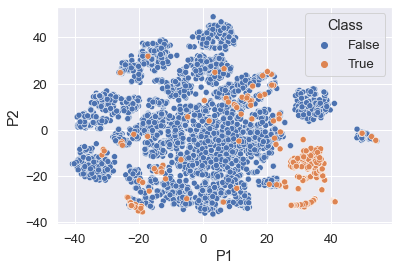

In [35]:
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'])

## Отчетливо виден кластер с мошенническими сделками. Теперь его неоходимо выявить алгоритмами

### Статистические Методы

### 3 std

In [36]:
def outlier_std(data, col, threshold=3):
    mean = data[col].mean()
    std = data[col].std()
    up_bound = mean + threshold * std
    low_bound = mean - threshold * std
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [37]:
def get_column_outliers(data, columns=None, function=outlier_std, threshold=3):
    if columns:
        columns_to_check = columns
    else:
        columns_to_check = data.columns
        
    outliers = pd.Series(data=[False]*len(data), index=data.index, name='is_outlier')
    comparison_table = {}
    for column in columns_to_check:
        anomalies, upper_bound, lower_bound = function(data, column, threshold=threshold)
        comparison_table[column] = [upper_bound, lower_bound, sum(anomalies), 100*sum(anomalies)/len(anomalies)]
        outliers[anomalies[anomalies].index] = True
    
    comparison_table = pd.DataFrame(comparison_table).T
    comparison_table.columns=['upper_bound', 'lower_bound', 'anomalies_count', 'anomalies_percentage']
    comparison_table = comparison_table.sort_values(by='anomalies_percentage', ascending=False)
    
    return comparison_table, outliers

def anomalies_report(outliers, return_result=False):
    if not return_result:
        print("Total number of outliers: {}\nPercentage of outliers:   {:.2f}%".format(
                sum(outliers), 100*sum(outliers)/len(outliers)))    
    else:
        return {'outliers count': sum(outliers), 'outliers %': 100*sum(outliers)/len(outliers)}

In [38]:
def plot_confustion_matrix(y_true, y_pred, ax=None, title=None):
    cm = confusion_matrix(y_true, y_pred)

    labels = ['True Neg','False Pos','False Neg','True Pos']
    labels = np.asarray(labels).reshape(2,2)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    cm = pd.DataFrame(cm, columns=['Honest', 'Fraud'], index=['Honest', 'Fraud'])
    
    if not ax:
        fig, ax = plt.subplots(figsize=(8, 6)) 
    if title:
        ax.set_title(title)
    sns.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues', ax=ax, linewidths=.5)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

In [39]:
data_features = data_scaled.drop(columns=['Class'])

In [40]:
comparison_table, std_outliers_full = get_column_outliers(data_features, threshold=3)
anomalies_report(std_outliers_full)

Total number of outliers: 37816
Percentage of outliers:   13.28%


In [41]:
comparison_table.head()

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
V27,7.471711,-7.488293,4771.0,1.675170
V6,3.660249,-3.190292,4652.0,1.633387
V20,6.889549,-6.527090,4645.0,1.630929
V2,3.486081,-3.579480,4318.0,1.516114
V8,6.643401,-6.726830,4221.0,1.482056


              precision    recall  f1-score   support

           0     0.9998    0.8686    0.9296    284315
           1     0.0117    0.9024    0.0232       492

    accuracy                         0.8686    284807
   macro avg     0.5058    0.8855    0.4764    284807
weighted avg     0.9981    0.8686    0.9280    284807



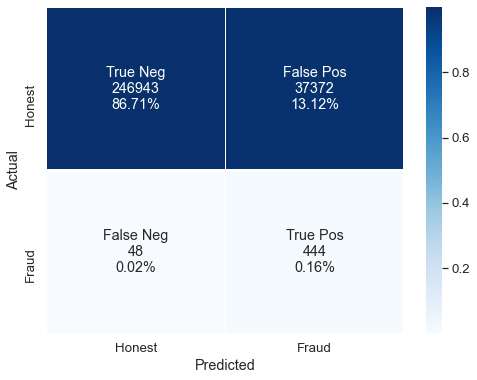

In [42]:
plot_confustion_matrix(df['Class'], std_outliers_full)
report = classification_report(df['Class'], std_outliers_full, digits=4)
print(report)

### На всех данных данный метод не смог показать хороших результатов, так как выловил больше 30к аномалий, хотя в данных их всего ~500. 

    Однако полнота у аномалий составляет 0.9, из чего следует, что почти все аномалии были выловлены. Остается понять стоит ли жертвовать точностью ради полноты

In [43]:
under_sampled_features = data_under_sampled_scaled.drop(columns=['Class'])

In [44]:
comparison_table, std_outliers_undersampled = get_column_outliers(under_sampled_features, threshold=3)
anomalies_report(std_outliers_undersampled)

Total number of outliers: 703
Percentage of outliers:   12.99%


              precision    recall  f1-score   support

       False     0.9616    0.9203    0.9405      4920
        True     0.4424    0.6321    0.5205       492

    accuracy                         0.8941      5412
   macro avg     0.7020    0.7762    0.7305      5412
weighted avg     0.9144    0.8941    0.9023      5412



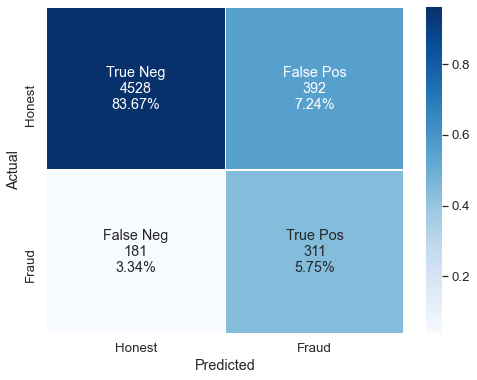

In [45]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], std_outliers_undersampled)
report = classification_report(data_under_sampled_scaled['Class'], std_outliers_undersampled, digits=4)
print(report)

### Однако на undersampled подвыборке алгоритм предсказал 311 аномалий, из которых 63% действительно являются аномалиями
#### Правильно было предсказано ~6% мошеннических сделок. Тоесть в этом случае точность повысилась до 44% а полнота снизалась до 63%

Text(0.5, 1.0, 'Predicted')

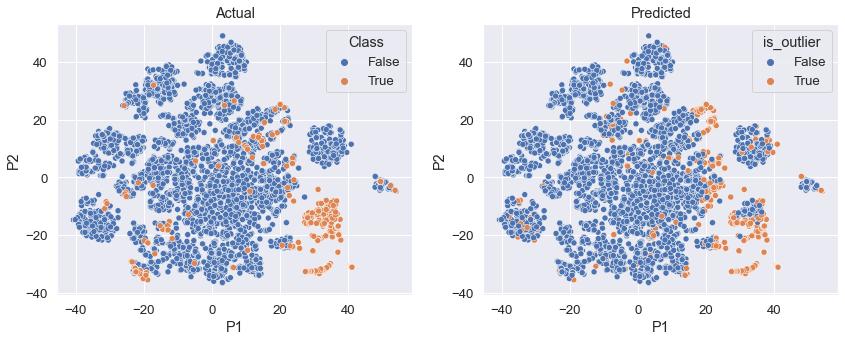

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=std_outliers_undersampled, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

### IQR

In [47]:
def outlier_iqr(data, col, threshold=3):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(1)
    return anomalies, up_bound, low_bound

In [48]:
comparison_table, iqr_outliers_full = get_column_outliers(data_features, function=outlier_iqr, threshold=3)
anomalies_report(iqr_outliers_full)

Total number of outliers: 53336
Percentage of outliers:   18.73%


In [49]:
comparison_table.head()

,upper_bound,lower_bound,anomalies_count,anomalies_percentage
Amount,3.770838,-3.229162,18941.0,6.650469
V27,3.554117,-3.445883,16524.0,5.801824
V20,3.567121,-3.432879,13385.0,4.699674
V28,3.510791,-3.489209,12573.0,4.414568
V8,3.569033,-3.430967,11285.0,3.962332


              precision    recall  f1-score   support

           0     0.9998    0.8140    0.8974    284315
           1     0.0085    0.9187    0.0168       492

    accuracy                         0.8142    284807
   macro avg     0.5042    0.8663    0.4571    284807
weighted avg     0.9981    0.8142    0.8959    284807



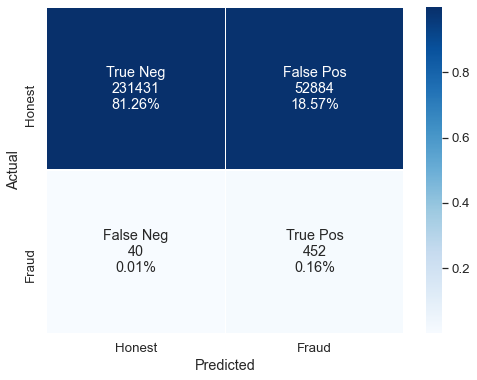

In [50]:
plot_confustion_matrix(df['Class'], iqr_outliers_full)
report = classification_report(df['Class'], iqr_outliers_full, digits=4)
print(report)

### По сравнению с 3 std, iqr понизил точность, однако повысил полноту, получилось выловить ~92% аномалий

In [51]:
comparison_table, iqr_outliers_undersampled = get_column_outliers(under_sampled_features, 
                                                                 function=outlier_iqr, 
                                                                 threshold=3)
anomalies_report(iqr_outliers_undersampled)

Total number of outliers: 1249
Percentage of outliers:   23.08%


              precision    recall  f1-score   support

       False     0.9897    0.8374    0.9072      4920
        True     0.3595    0.9126    0.5158       492

    accuracy                         0.8442      5412
   macro avg     0.6746    0.8750    0.7115      5412
weighted avg     0.9324    0.8442    0.8716      5412



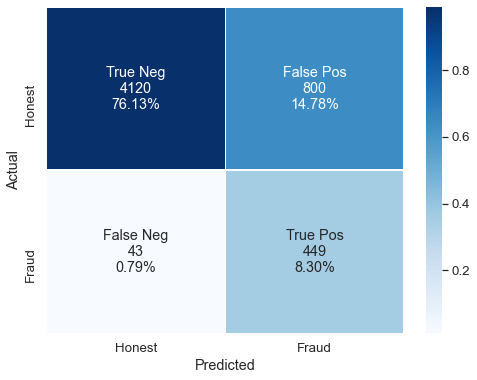

In [52]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], iqr_outliers_undersampled)
report = classification_report(data_under_sampled_scaled['Class'], iqr_outliers_undersampled, digits=4)
print(report)

### На undersampled подвыборке iqr алгоритм предсказал 1249 аномалий, из которых 91% являются аномалиями, можно считать, что данный метод справился лучше 3 std

Text(0.5, 1.0, 'Predicted')

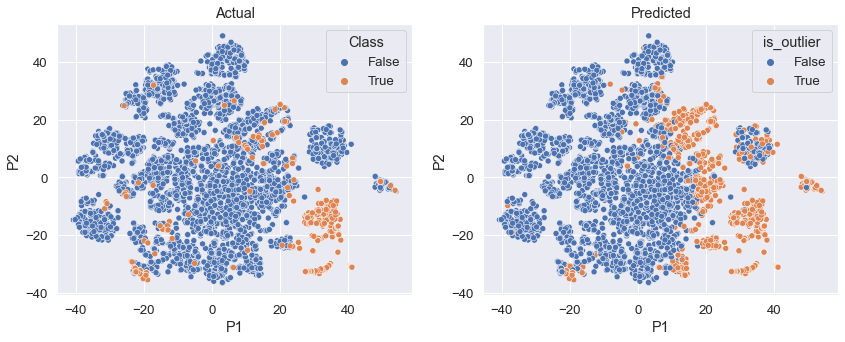

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=iqr_outliers_undersampled, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## Кластеризация

In [54]:
class DistanceOutliers(BaseEstimator):
    """
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).values.reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = pd.Series((distances > self.threshold), name='is_outlier')
        return predictions

### Данный подвид методов имеет смысл проверять только на undersampled датасете, так как изобразить на пониженной размерности можно только их

## Euclidean

In [55]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(data_features)
euclidian_outliers_full = euclidian_model.predict(data_features)
anomalies_report(euclidian_outliers_full)

Total number of outliers: 28481
Percentage of outliers:   10.00%


              precision    recall  f1-score   support

       False     0.9998    0.9014    0.9480    284315
        True     0.0154    0.8943    0.0304       492

    accuracy                         0.9014    284807
   macro avg     0.5076    0.8978    0.4892    284807
weighted avg     0.9981    0.9014    0.9465    284807



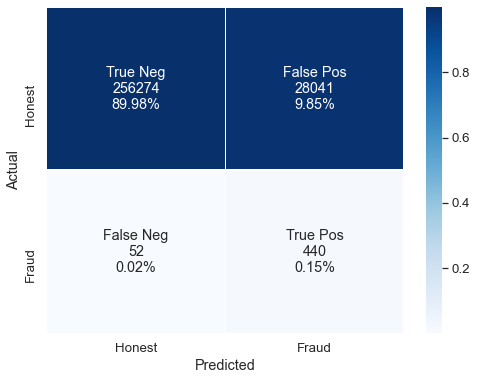

In [56]:
plot_confustion_matrix(data_scaled['Class'], euclidian_outliers_full)
report = classification_report(data_scaled['Class'], euclidian_outliers_full, digits=4)
print(report)

In [57]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90)
euclidian_model.fit(under_sampled_features)
euclidian_outliers_undersampled = euclidian_model.predict(under_sampled_features)
anomalies_report(euclidian_outliers_undersampled)

Total number of outliers: 542
Percentage of outliers:   10.01%


              precision    recall  f1-score   support

       False     0.9665    0.9567    0.9616      4920
        True     0.6070    0.6687    0.6364       492

    accuracy                         0.9305      5412
   macro avg     0.7868    0.8127    0.7990      5412
weighted avg     0.9338    0.9305    0.9320      5412



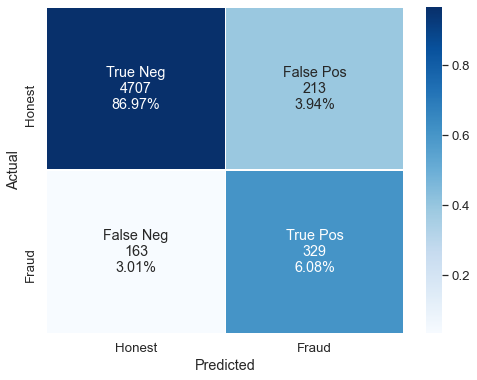

In [58]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], euclidian_outliers_undersampled)
report = classification_report(data_under_sampled_scaled['Class'], euclidian_outliers_undersampled, digits=4)
print(report)

Text(0.5, 1.0, 'Predicted')

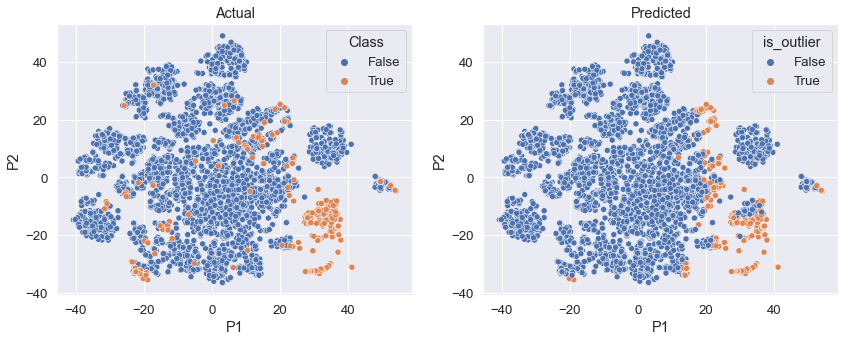

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=euclidian_outliers_undersampled, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## CityBlock

In [60]:
cityblock_model = DistanceOutliers(metric='cityblock', percentile=90)
cityblock_model.fit(data_features)
cityblock_outliers_full = cityblock_model.predict(data_features)
anomalies_report(cityblock_outliers_full)

Total number of outliers: 28481
Percentage of outliers:   10.00%


              precision    recall  f1-score   support

       False     0.9998    0.9013    0.9480    284315
        True     0.0152    0.8801    0.0299       492

    accuracy                         0.9013    284807
   macro avg     0.5075    0.8907    0.4890    284807
weighted avg     0.9981    0.9013    0.9464    284807



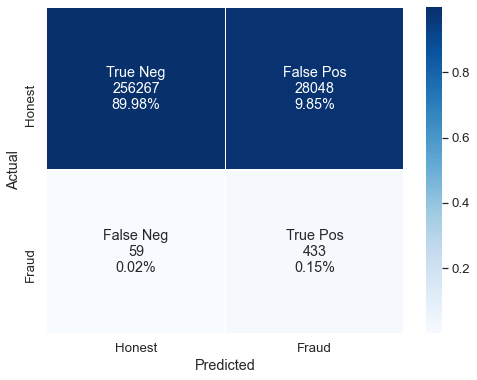

In [61]:
plot_confustion_matrix(data_scaled['Class'], cityblock_outliers_full)
report = classification_report(data_scaled['Class'], cityblock_outliers_full, digits=4)
print(report)

In [62]:
cityblock_model = DistanceOutliers(metric='cityblock', percentile=90)
cityblock_model.fit(under_sampled_features)
cityblock_outliers_undersampled = cityblock_model.predict(under_sampled_features)
anomalies_report(cityblock_outliers_undersampled)

Total number of outliers: 542
Percentage of outliers:   10.01%


              precision    recall  f1-score   support

       False     0.9696    0.9598    0.9647      4920
        True     0.6347    0.6992    0.6654       492

    accuracy                         0.9361      5412
   macro avg     0.8021    0.8295    0.8150      5412
weighted avg     0.9392    0.9361    0.9375      5412



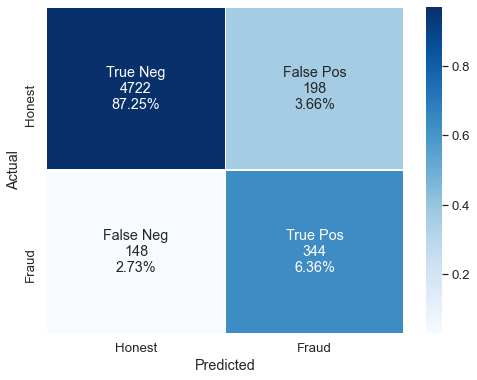

In [63]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], cityblock_outliers_undersampled)
report = classification_report(data_under_sampled_scaled['Class'], cityblock_outliers_undersampled, digits=4)
print(report)

Text(0.5, 1.0, 'Predicted')

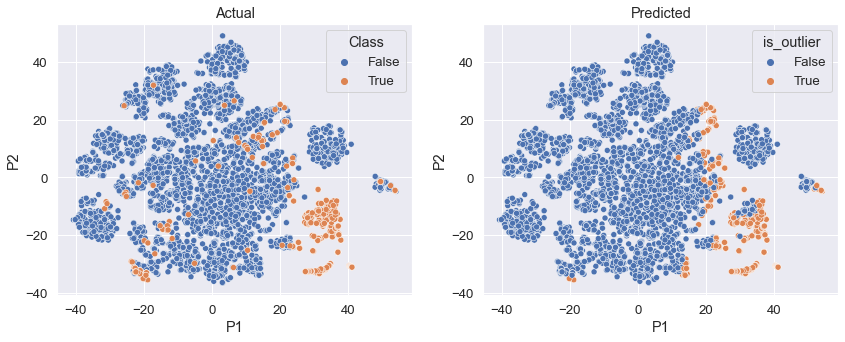

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=cityblock_outliers_undersampled, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## DBSCAN

In [65]:
data_under_sampled_scaled['Class'].value_counts(normalize=True)

False    0.909091
True     0.090909
Name: Class, dtype: float64

In [80]:
from sklearn.cluster import DBSCAN

num_clusters = []
anomaly_percentage = []

# В действительности у нас 9% мошеннических сделок. Поставил ограничение на поиск аномалий до 10%
outlier_maximum_percent = 0.1

# Для того, чтобы следить за работой сделаем переменную, которая будет паказывать кол-во циклов


# берем маленький эпсилон и начинаем увеличивать
# eps_range = np.arange(0.1, 5.1, 0.1)
min_samples_range = range(2, 14)

min_samples_and_eps_hist = []

for min_samples_count in min_samples_range:
    print(f'min_samples = {min_samples_count}')
    loop_count = 1
    
    eps = 0.5
    eps_history = [eps]
    
    # для начала считаем все наблюдения аномальными
    outlier_percentage = 1.
    
    while outlier_percentage>outlier_maximum_percent or outlier_percentage==0.0:
        model = DBSCAN(eps=eps, min_samples=min_samples_count, n_jobs=-1).fit(under_sampled_features)  
        labels = model.labels_
        num_clusters.append(len(np.unique(labels))-1)
        labels = np.array([1 if label == -1 else 0 for label in labels])
        # считаем текущий процент "шума"
        outlier_percentage = sum(labels==1) / len(labels)    
        eps += 0.05
        eps_history.append(eps)
        anomaly_percentage.append(outlier_percentage)
        
        if loop_count%10 == 0:
            print(f'\tПрошло {loop_count} циклов обучения. outlier_percentage = {outlier_percentage}, eps = {eps}')
        loop_count += 1
    
    print(f'\tПрошло {loop_count} циклов обучения. outlier_percentage = {outlier_percentage}, eps = {eps}')
    
    min_samples_and_eps_hist.append([min_samples_count, eps_history])

min_samples = 2
	Прошло 10 циклов обучения. outlier_percentage = 0.8094974131559497, eps = 1.0000000000000004
	Прошло 20 циклов обучения. outlier_percentage = 0.6511456023651145, eps = 1.5000000000000009
	Прошло 30 циклов обучения. outlier_percentage = 0.504619364375462, eps = 2.0000000000000013
	Прошло 40 циклов обучения. outlier_percentage = 0.3662232076866223, eps = 2.4999999999999996
	Прошло 50 циклов обучения. outlier_percentage = 0.2572062084257206, eps = 2.999999999999998
	Прошло 60 циклов обучения. outlier_percentage = 0.18625277161862527, eps = 3.499999999999996


KeyboardInterrupt: 

In [67]:
dbscan_result_df = pd.DataFrame()

for result in min_samples_and_eps_hist:
    min_samples = result[0]
    max_eps = result[1][-1]
    
    model = DBSCAN(eps=max_eps, min_samples=min_samples, n_jobs=-1)
    model.fit(under_sampled_features)
    density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])
    
    cr_df = pd.DataFrame(classification_report(data_under_sampled_scaled['Class'], density_outlier, digits=4, output_dict=True))
    
    report = anomalies_report(density_outlier, return_result=True)
    report['eps'] = max_eps
    
    dbscan_result_df[f'min_samples_{min_samples}'] = cr_df['True'].append(pd.Series(report))

In [68]:
dbscan_result_df

,min_samples_2,min_samples_3,min_samples_4,min_samples_5,min_samples_6,min_samples_7,min_samples_8,min_samples_9,min_samples_10,min_samples_11,min_samples_12,min_samples_13
precision,0.337917,0.378378,0.398482,0.450570,0.478011,0.481905,0.499044,0.511364,0.510476,0.530418,0.549430,0.541985
recall,0.349593,0.398374,0.426829,0.481707,0.508130,0.514228,0.530488,0.548780,0.544715,0.567073,0.587398,0.577236
f1-score,0.343656,0.388119,0.412169,0.465619,0.492611,0.497542,0.514286,0.529412,0.527040,0.548134,0.567780,0.559055
support,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
outliers count,509.000000,518.000000,527.000000,526.000000,523.000000,525.000000,523.000000,528.000000,525.000000,526.000000,526.000000,524.000000
outliers %,9.405026,9.571323,9.737620,9.719143,9.663710,9.700665,9.663710,9.756098,9.700665,9.719143,9.719143,9.682188
eps,4.550000,4.750000,4.900000,5.200000,5.350000,5.450000,5.600000,5.650000,5.700000,5.800000,5.900000,5.950000


### Самый большой f1_score набрал dbscan с min_samples = 12 и eps = 5,9

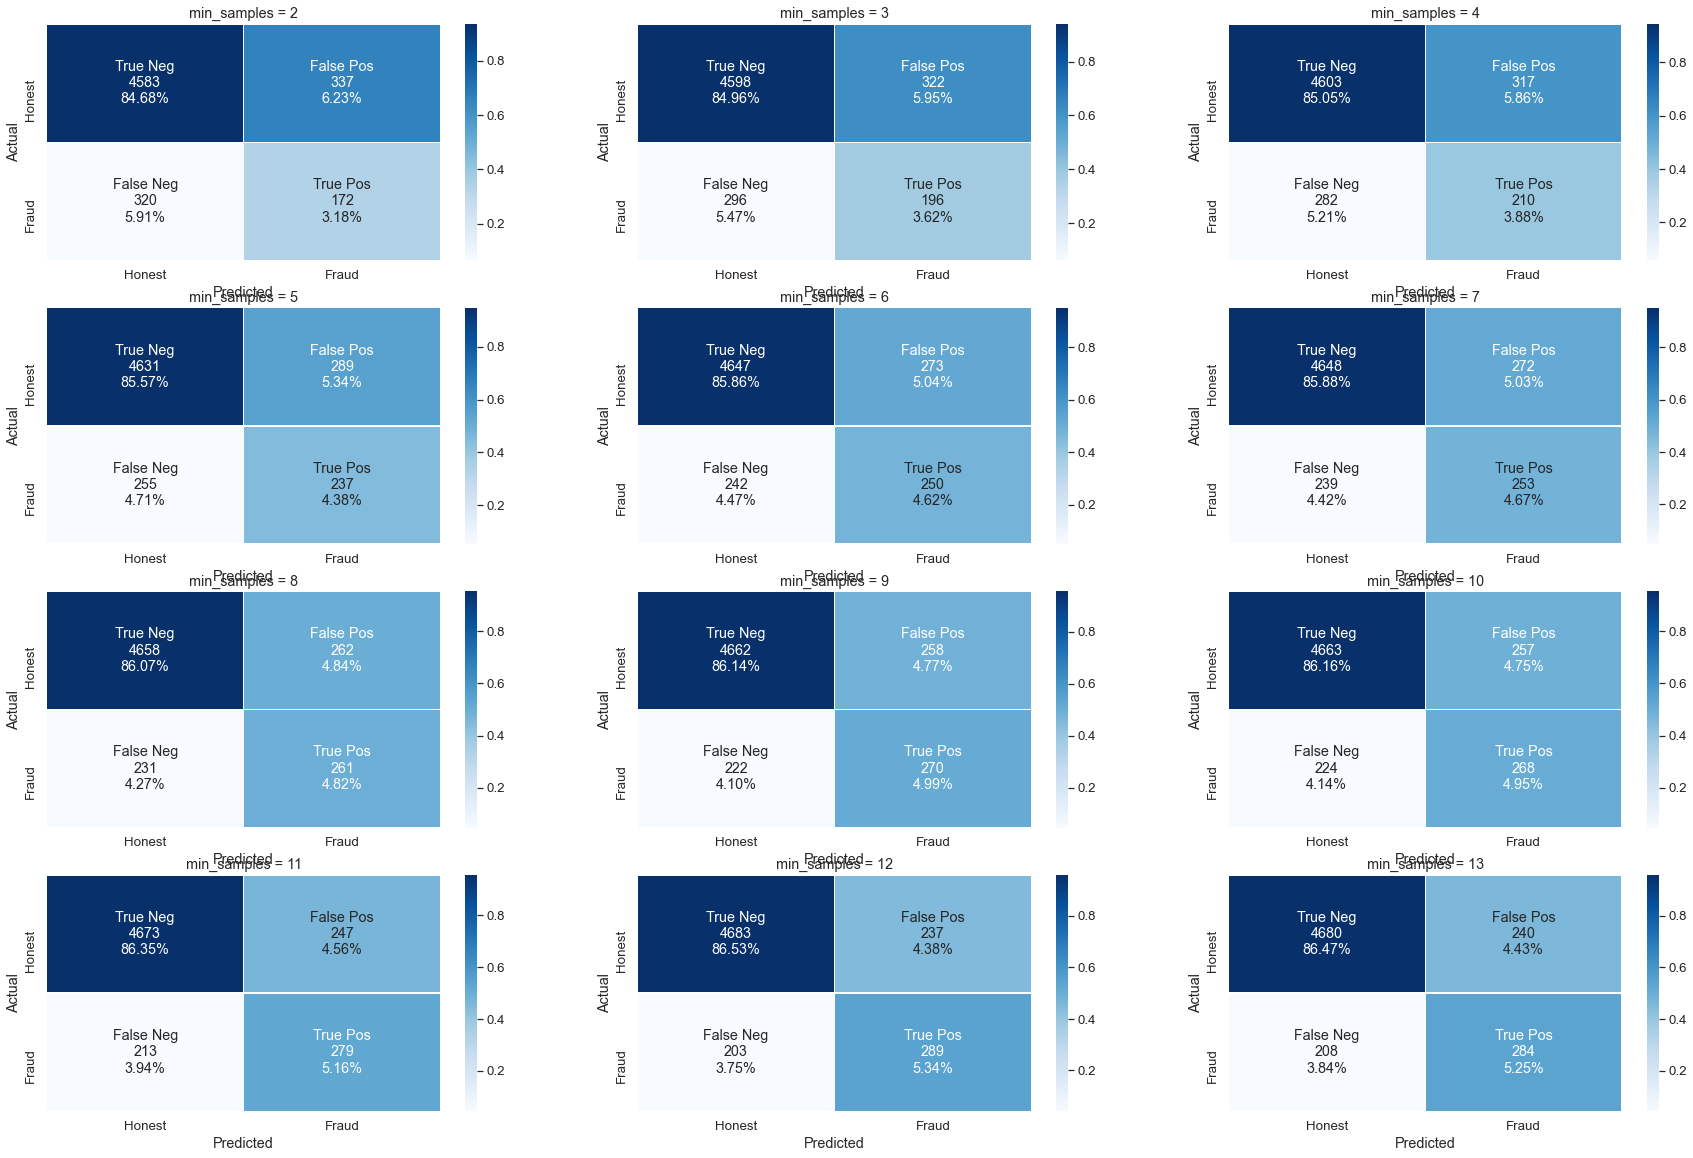

In [69]:
fig, ax = plt.subplots(4, 3, figsize=(30, 20))

row = 0
col = 0
    
for result in min_samples_and_eps_hist:
    min_samples = result[0]
    max_eps = result[1][-1]
    
    model = DBSCAN(eps=max_eps, min_samples=min_samples, n_jobs=-1)
    model.fit(under_sampled_features)
    density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])
    
    plot_confustion_matrix(data_under_sampled_scaled['Class'], density_outlier, ax=ax[row, col], title=f'min_samples = {result[0]}')
    
    col += 1
    if col > 2:
        col = 0
        row += 1

### Посмотрим на результат лучшего кластеризатора на сниженной размерности

In [70]:
model = DBSCAN(eps=5.9, min_samples=12, n_jobs=-1)
model.fit(under_sampled_features)
density_outlier = np.array([1 if label == -1 else 0 for label in model.labels_])

Text(0.5, 1.0, 'Predicted')

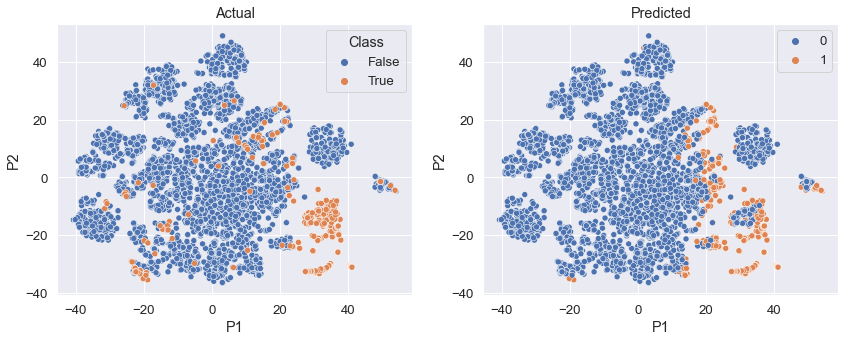

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=density_outlier, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## One Class SVM

In [72]:
one_class_svm = OneClassSVM(nu=0.10, gamma='auto')
one_class_svm.fit(under_sampled_features)
svm_outliers_undersampled = one_class_svm.predict(under_sampled_features)
svm_outliers_undersampled = np.array([1 if label == -1 else 0 for label in svm_outliers_undersampled])

In [73]:
anomalies_report(svm_outliers_undersampled)

Total number of outliers: 542
Percentage of outliers:   10.01%


              precision    recall  f1-score   support

       False     0.9493    0.9396    0.9444      4920
        True     0.4520    0.4980    0.4739       492

    accuracy                         0.8995      5412
   macro avg     0.7007    0.7188    0.7092      5412
weighted avg     0.9041    0.8995    0.9017      5412



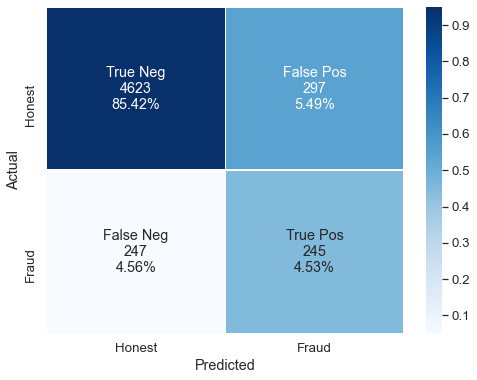

In [74]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], svm_outliers_undersampled)
report = classification_report(data_under_sampled_scaled['Class'], svm_outliers_undersampled, digits=4)
print(report)

Text(0.5, 1.0, 'Predicted')

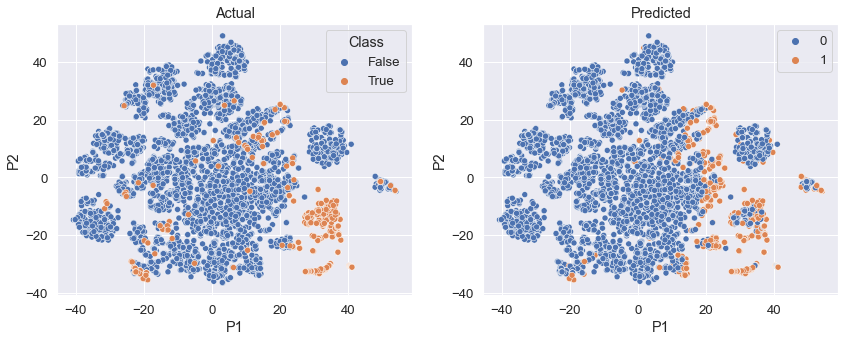

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=svm_outliers_undersampled, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

## Isolation Forest

In [76]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, bootstrap=True, n_jobs=-1)
isolation_forest.fit(under_sampled_features)

isolation_outliers = isolation_forest.predict(under_sampled_features)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [77]:
anomalies_report(isolation_outliers)

Total number of outliers: 542
Percentage of outliers:   10.01%


              precision    recall  f1-score   support

       False     0.9739    0.9640    0.9689      4920
        True     0.6734    0.7419    0.7060       492

    accuracy                         0.9438      5412
   macro avg     0.8237    0.8529    0.8375      5412
weighted avg     0.9466    0.9438    0.9450      5412



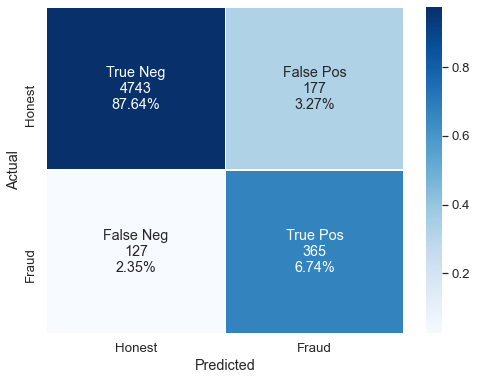

In [78]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], isolation_outliers)
report = classification_report(data_under_sampled_scaled['Class'], isolation_outliers, digits=4)
print(report)

Text(0.5, 1.0, 'Predicted')

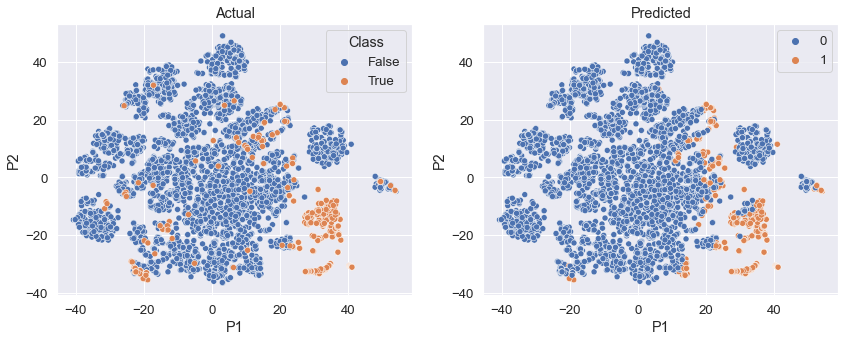

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=data_under_sampled_scaled['Class'], ax=ax[0])
sns.scatterplot(x='P1', y='P2', data=data_tsne, hue=isolation_outliers, ax=ax[1])

ax[0].set_title('Actual')
ax[1].set_title('Predicted')

### Сравним все кластеризаторы

In [83]:
summary = np.concatenate((
    [std_outliers_undersampled], 
    [iqr_outliers_undersampled], 
    [euclidian_outliers_undersampled], 
    [cityblock_outliers_undersampled],
    [density_outlier],
    [svm_outliers_undersampled],
    [isolation_outliers]
))

In [84]:
summary = pd.DataFrame(
    summary.T, 
    columns=['std', 'iqr', 'euclid', 'cityblock', 'dbscan', 'svm', 'forest']
)

In [85]:
summary

,std,iqr,euclid,cityblock,dbscan,svm,forest
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
5407,0,1,0,1,0,1,1
5408,0,1,0,0,0,0,0
5409,0,1,0,0,0,0,0
5410,0,1,0,1,1,0,1


In [86]:
summary.sum(axis=1).value_counts()

0    4053
1     563
7     306
2     136
6     126
5      90
3      89
4      49
dtype: int64

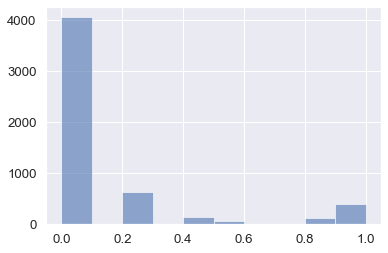

In [76]:
outlier_score = summary.mean(axis=1)
plt.hist(outlier_score, alpha=0.6);

### Все методы указали 306 объекта как аномалии, проверим, на сколько они были правы

In [87]:
all_methods_agreed = summary.sum(axis=1) == 7

In [88]:
anomalies_report(all_methods_agreed)

Total number of outliers: 306
Percentage of outliers:   5.65%


              precision    recall  f1-score   support

       False     0.9393    0.9748    0.9567      4920
        True     0.5948    0.3699    0.4561       492

    accuracy                         0.9198      5412
   macro avg     0.7670    0.6724    0.7064      5412
weighted avg     0.9080    0.9198    0.9112      5412



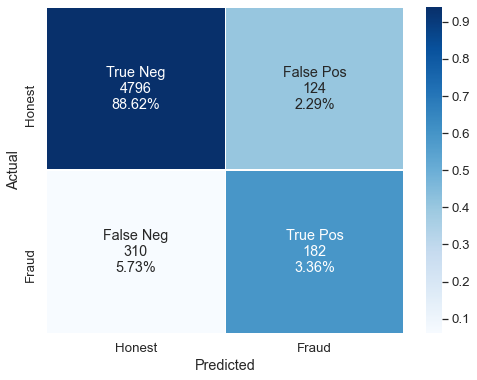

In [89]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], all_methods_agreed)
report = classification_report(data_under_sampled_scaled['Class'], all_methods_agreed, digits=4)
print(report)

### Проверим на данных, где хотя бы один метод предсказал анамалию

In [90]:
all_methods_agreed = summary.sum(axis=1) >= 1

In [91]:
anomalies_report(all_methods_agreed)

Total number of outliers: 1359
Percentage of outliers:   25.11%


              precision    recall  f1-score   support

       False     0.9894    0.8150    0.8938      4920
        True     0.3304    0.9126    0.4851       492

    accuracy                         0.8239      5412
   macro avg     0.6599    0.8638    0.6895      5412
weighted avg     0.9295    0.8239    0.8566      5412



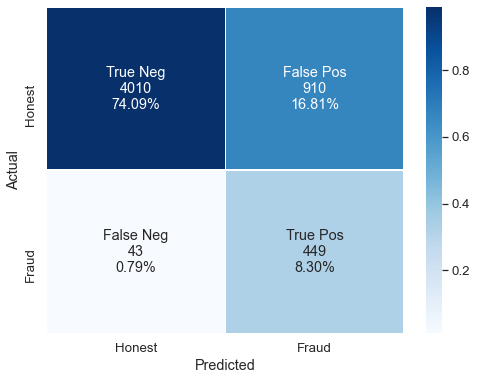

In [92]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], all_methods_agreed)
report = classification_report(data_under_sampled_scaled['Class'], all_methods_agreed, digits=4)
print(report)

### Точность конечно упала, зато полнота значительно выросла.

### Ну и финально проверим по большинству, тоесть как минимум 4 метода предсказали аномалию

In [104]:
all_methods_agreed = summary.sum(axis=1) >= 4

In [105]:
anomalies_report(all_methods_agreed)

Total number of outliers: 571
Percentage of outliers:   10.55%


              precision    recall  f1-score   support

       False     0.9698    0.9543    0.9620      4920
        True     0.6060    0.7033    0.6510       492

    accuracy                         0.9314      5412
   macro avg     0.7879    0.8288    0.8065      5412
weighted avg     0.9368    0.9314    0.9337      5412



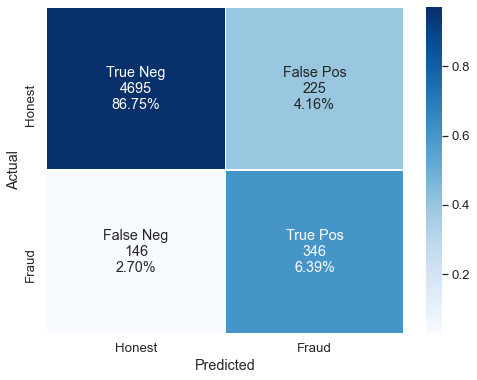

In [106]:
plot_confustion_matrix(data_under_sampled_scaled['Class'], all_methods_agreed)
report = classification_report(data_under_sampled_scaled['Class'], all_methods_agreed, digits=4)
print(report)

### К сожалению, такой ансамбль уступил лидеру(Isolation Forest).